# **DATA AGGREGATION**

Gather the data set
*   Cleveland
*   Hungary
*   Switzerland
*   VA long beach
*   Staglog

And combining the data sets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import csv files

In [ ]:
header=["age",	"sex",	"cp",	"trestbps",	"chol",	"restecg",	"fbs",	"thalach",	"exang"	,"oldpeak",	"slope"	,"ca",	"thal",	"target"]
cleveland = pd.read_csv('final_cleveland.csv',names=header)
Hungary = pd.read_csv('final_hungary.csv',names=header)
switzerland = pd.read_csv('final_switzerland.csv',names=header)
VAlong = pd.read_csv('final_va.csv',names=header)
statlog = pd.read_csv('final_statlog.csv',names=header)

### Combine all the data sets

In [ ]:
original = pd.concat([cleveland,Hungary,switzerland,VAlong,statlog])

In [ ]:
original['target'].unique()

array([0, 2, 1, 3, 4])

### Replace ? with NaN values

In [ ]:
final=original

In [ ]:
final.replace('?',np.nan,inplace=True )

In [ ]:
final['target']=final['target'].apply(lambda x:1 if x>0 else 0)

In [ ]:
final

,age,sex,cp,trestbps,chol,restecg,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


# **DATA PREPROCESSING**



1. Handling missing values
2. Data transformation
        Standard scalar
              * Attribute selection
              * Aggregate

### SPLIT

In [ ]:
x=final.drop(['target'],axis=1)
y=final['target']

In [ ]:
final.isnull().sum()

age           0
sex           0
cp            0
trestbps     58
chol          7
restecg      82
fbs           1
thalach      54
exang        54
oldpeak      62
slope       119
ca          320
thal        220
target        0
dtype: int64

In [ ]:
final

### EDA

In [ ]:
final.sample(5)

In [ ]:
final.shape

In [ ]:
final.columns

In [ ]:
final.describe()

In [ ]:
final.info()

In [ ]:
final.nunique()

In [ ]:
final.dtypes

### Handling missing or null values using KNN Imputation method

---



In [ ]:
cols=['trestbps','chol','restecg','fbs','thalach','exang','oldpeak','slope','ca','thal']

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
for col in cols:
  imputer.fit_transform(x[[col]])
  x[[col]]=imputer.transform(x[[col]])

In [ ]:
x.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
fbs         0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## **DATA VISUALISATIONS**

# correlation coefficient heat map

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cor=x.corr()
top_corr_feature=cor.index
plt.figure(figsize=(10,10))
sns.heatmap(x[top_corr_feature].corr(),annot=True,cmap="Purples")
plt.title("HEATMAP")
plt.show()

ca and thal are highly correlated as u can see its value is 0.78

### Inference

In [ ]:
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
x.hist(ax=ax,bins=30)
plt.show()

In [ ]:
X=x
sns.countplot(x ='sex', data = X)
plt.title("count vs sex")

0 is male and 1 is female
this shows the no of male and female in the dataset

In [ ]:
sns.countplot(x ='target', data = final)
plt.title("count vs target")

as u can see its in ratio 2:1 so our data is imbalanced ,

this shows the count of various stages of chronic heart disease
target 0 is no heart disease
target 4 has severe heart disease

In [ ]:
#Average values of features that are responsible for disease for female
final[(final.target ==  1) & (final.sex == 1)].describe()[1:2]

In [ ]:
#Average values of features that are responsible for not having disease for male
final[(final.target ==  0) & (final.sex == 1)].describe()[1:2]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=888)
X_resampled, y_resampled = ros.fit_resample(x, final['target'])
X_resampled.value_counts()

age  sex  cp  trestbps    chol    restecg   fbs  thalach     exang     oldpeak  slope      ca         thal     
67   0    3   152.000000   277.0  0.000000  0.0  172.000000  0.000000  0.00000   1.000000   1.000000   3.000000    7
57   0    4   180.000000   347.0  0.000000  1.0  126.000000  1.000000  0.80000   2.000000  -9.000000  -9.000000    6
51   1    3   94.000000    227.0  0.000000  0.0  154.000000  1.000000  0.00000   1.000000   1.000000   7.000000    6
66   1    4   160.000000   228.0  0.000000  2.0  138.000000  0.000000  2.30000   1.000000   0.000000   6.000000    5
60   0    3   120.000000   178.0  1.000000  0.0  96.000000   0.000000  0.00000   1.000000   0.000000   3.000000    5
                                                                                                                  ..
56   1    3   155.000000   0.0    0.000000  1.0  99.000000   0.000000  0.00000   2.000000  -2.541379   3.000000    1
              131.819788   208.0  1.000000  1.0  140.300176  0.367077

In [ ]:
X_resampled.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
fbs         0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
X=X_resampled
Y=y_resampled

In [ ]:
sns.countplot(x =Y, data = final)
plt.title("count vs target")

StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole datase

### DATA TRANSFORMATION USING STANDARD SCALAR

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled.shape

(1558, 13)

### Split the data into training and testing subsets


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state=0)

In [ ]:
print(x_train.shape)

In [ ]:
print(x_test.shape)

In [ ]:
cols1= X.columns
X_Train= pd.DataFrame(data=x_train, columns=cols1)

In [ ]:
X_Train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
fbs         0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
X_Test= pd.DataFrame(data=x_test, columns=cols1)

In [ ]:
X_Test.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
fbs         0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

### **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=2,max_leaf_nodes=None,splitter='best')
dt.n_classes_ = 2  # Set number of classes
dt.fit(X_Train, y_train)
y_pred = dt.predict(X_Test)
Accuracydt = accuracy_score(y_test, y_pred)
print('Accuracy:', Accuracydt)

Accuracy: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix
dtree_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(dtree_cm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DT')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = dt.predict_proba(X_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
#DecisionTreeBaggingClassifier
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=2,max_leaf_nodes=None,splitter='best')
bag = BaggingClassifier(base_estimator=dt,n_estimators=100,max_samples=0.8,
                                 max_features=0.8,random_state=42)
bag.fit(X_Train, y_train)
y_pred = bag.predict(X_Test)
Accuracydtbm = accuracy_score(y_test, y_pred)
print("Accuracy:", Accuracydtbm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7435897435897436


In [ ]:
b=confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(b), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DTBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

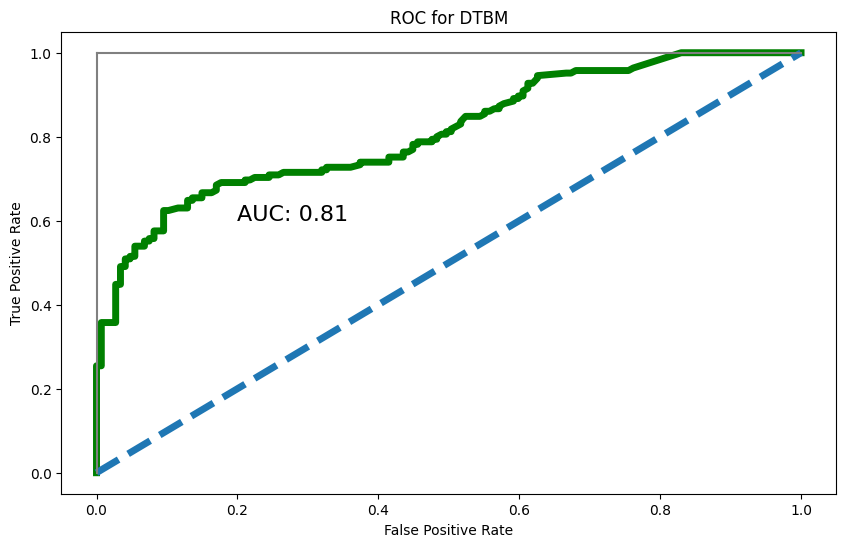

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = bag.predict_proba(X_Test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for DTBM')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### **RANDOM FOREST**

In [ ]:
# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rf = RandomForestClassifier(criterion='gini',max_depth=10,
                            max_features='sqrt',min_samples_split=5,min_samples_leaf=1,n_estimators=100)
rf.fit(X_Train, y_train)
y_pred1 = rf.predict(X_Test)
Accuracyrf = accuracy_score(y_test, y_pred1)
print('Accuracy:', Accuracyrf)

Accuracy: 0.7371794871794872


In [ ]:
rfcm=confusion_matrix(y_test,y_pred1)
sns.heatmap(pd.DataFrame(rfcm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for RFBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

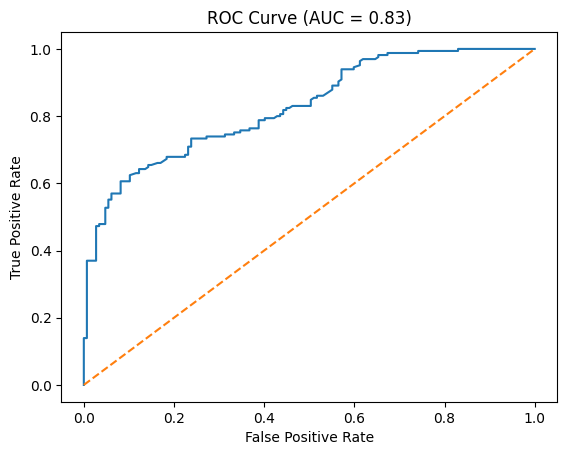

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = rf.predict_proba(X_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(criterion='gini',max_depth=10,
                            max_features='sqrt',min_samples_split=5,min_samples_leaf=1,n_estimators=100)
bagged_rf = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)
bagged_rf.fit(X_Train, y_train)
y_pred1 = bagged_rf.predict(X_Test)
Accuracyrfbm = accuracy_score(y_test, y_pred1)
print('Accuracy:', Accuracyrfbm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7532051282051282


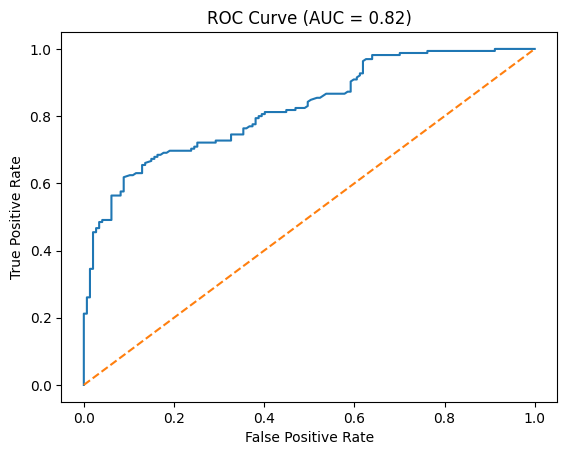

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = bagged_rf.predict_proba(X_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
rfbmcm=confusion_matrix(y_test,y_pred1)
sns.heatmap(pd.DataFrame(rfbmcm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for RFBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### **K NEAREST NEIGHBOUR**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric='minkowski',n_jobs=1,p=2)
model.fit(X_Train, y_train)
Y_pred = model.predict(X_Test)
Score_knn = model.score(X_Test, y_test)
print('accuracy:', Score_knn)

accuracy: 0.6923076923076923


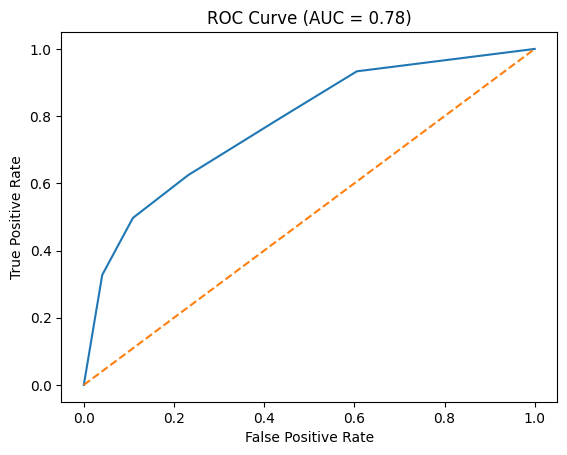

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = model.predict_proba(X_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
knn_cm=confusion_matrix(y_test,Y_pred)
sns.heatmap(pd.DataFrame(knn_cm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
rf = KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric='minkowski',n_jobs=1,weights='uniform')
bagged_rf = BaggingClassifier(base_estimator=rf, random_state=42)
bagged_rf.fit(X_Train, y_train)
y_pred2 = bagged_rf.predict(X_Test)
Accuracyknbm = accuracy_score(y_test, y_pred2)
print('Accuracy:', Accuracyknbm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7051282051282052


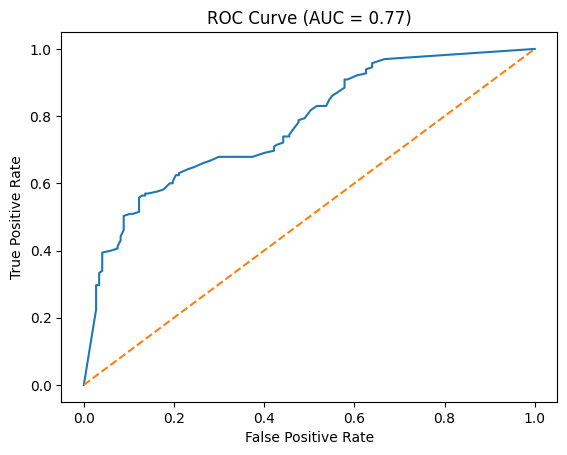

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = bagged_rf.predict_proba(X_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

### **ADAPTIVE BOOSTING**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_Train, y_train)
y_pred = adaboost.predict(X_Test)
accada=accuracy_score(y_test, y_pred)
print("AdaBoost Classifier accuracy:", accada)

AdaBoost Classifier accuracy: 0.7564102564102564


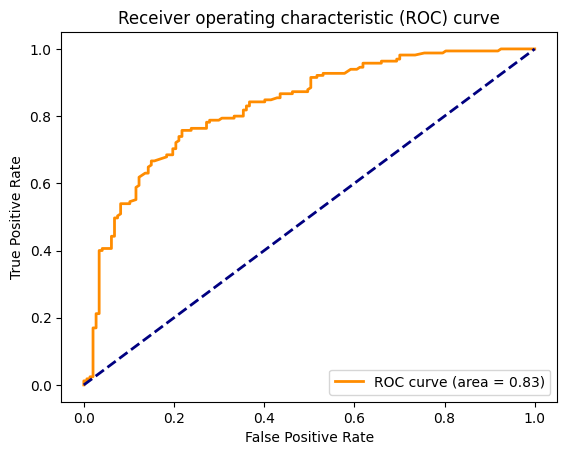

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_proba = adaboost.predict_proba(X_Test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = adaboost.predict(X_Test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
bagging_adaboost = BaggingClassifier(base_estimator=adaboost, n_estimators=10, random_state=42)
bagging_adaboost.fit(X_Train, y_train)
y_pred = bagging_adaboost.predict(X_Test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging-AdaBoost accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging-AdaBoost accuracy: 0.7467948717948718


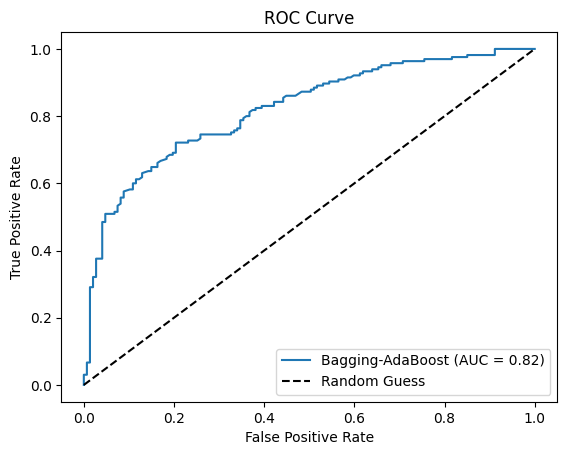

In [ ]:
y_pred = bagging_adaboost.predict(X_Test)
y_prob = bagging_adaboost.predict_proba(X_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='Bagging-AdaBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
grad_boost.fit(X_Train, y_train)
y_pred = grad_boost.predict(X_Test)
graaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", graaccuracy)


Accuracy: 0.7596153846153846


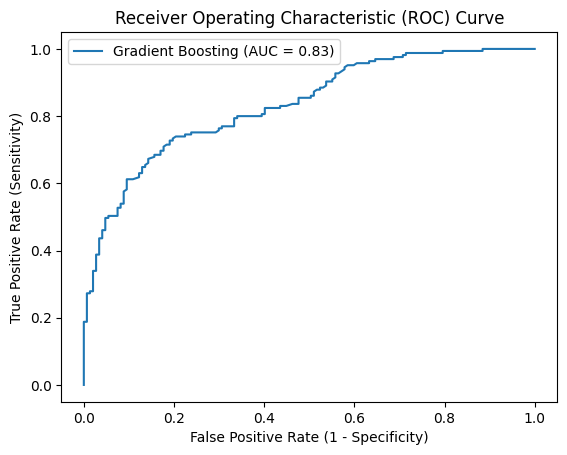

In [ ]:
y_prob = grad_boost.predict_proba(X_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

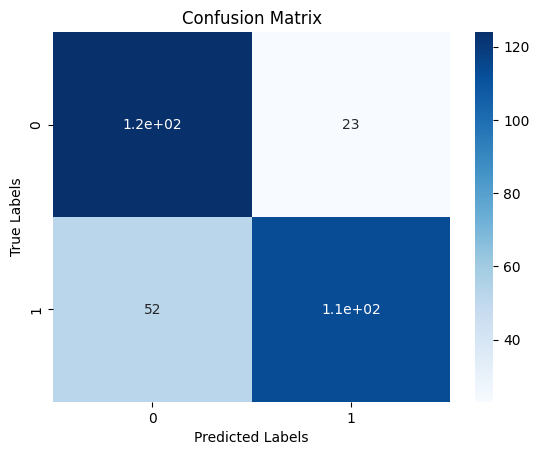

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
bagging = BaggingClassifier(base_estimator=grad_boost, n_estimators=10)
bagging.fit(X_Train, y_train)
y_pred = bagging.predict(X_Test)
Gradboostaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", Gradboostaccuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7467948717948718


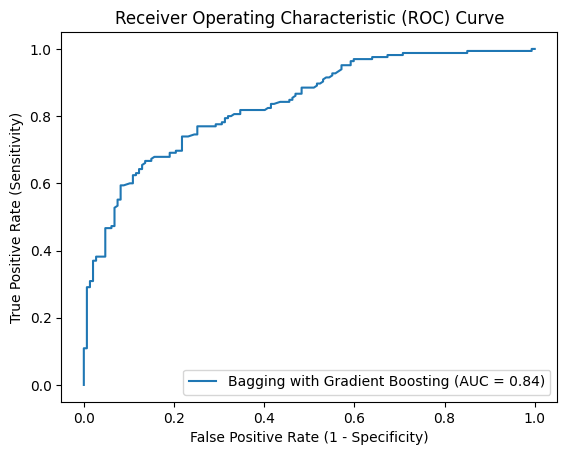

In [ ]:
y_prob = bagging.predict_proba(X_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='Bagging with Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print("Accuracy of decision tree:",Accuracydt)
print("Accuracy of random forest:",Accuracyrf)
print("Accuracy of knn:",Score_knn)
print("Accuracy of decision tree bagging method:",Accuracydtbm)
print("Accuracy of randomforest bagging method:",Accuracyrfbm)
print("Accuracy of KNN bagging method:",Accuracyknbm)
print("Accuracy of adaboost:",accada)
print("Accuracy of Bagging-AdaBoost ", accuracy)
print("Accuracy of Gradient Boost ", graaccuracy)
print("Accuracy of Bagging-Gradient Boost ", Gradboostaccuracy)

Accuracy of decision tree: 0.75
Accuracy of random forest: 0.7371794871794872
Accuracy of knn: 0.6923076923076923
Accuracy of decision tree bagging method: 0.7435897435897436
Accuracy of randomforest bagging method: 0.7532051282051282
Accuracy of KNN bagging method: 0.7051282051282052
Accuracy of adaboost: 0.7564102564102564
Accuracy of Bagging-AdaBoost  0.7467948717948718
Accuracy of Gradient Boost  0.7596153846153846
Accuracy of Bagging-Gradient Boost  0.7467948717948718


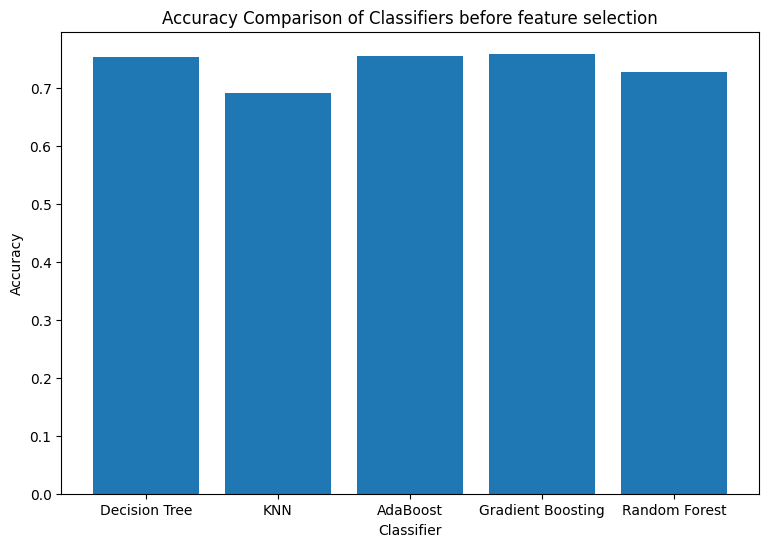

In [ ]:
classifiers = [DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier()
]
results = []
for clf in classifiers:
    clf.fit(X_Train, y_train)
    y_pred = clf.predict(X_Test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
classifiers_names = ['Decision Tree', 'KNN', 'AdaBoost', 'Gradient Boosting', 'Random Forest']
plt.figure(figsize=(9, 6))
plt.bar(classifiers_names, results)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers before feature selection')
plt.show()

# **DATA REDUCTION**

Using:
1.   LASSO
2.   Refief



### **LASSO**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_Train, y_train)

Lasso(alpha=0.001)

In [ ]:
coeffs = pd.DataFrame({'Variable': x.columns, 'Coefficient': lasso.coef_})
coeffs = coeffs.sort_values(by='Coefficient', ascending=False)

In [ ]:
coeffs

In [ ]:
coeffs.head(11)

,Variable,Coefficient
2,cp,0.096879
9,oldpeak,0.084576
10,slope,0.075901
12,thal,0.057205
8,exang,0.055684
1,sex,0.042129
11,ca,0.025615
3,trestbps,0.011610
5,restecg,0.009664
0,age,0.001334


In [ ]:
coefs = lasso.coef_
feature_names = x.columns
coef_names = sorted(zip(coefs, feature_names), reverse=True)
selected_features = [coef_name[1] for coef_name in coef_names if coef_name[1] not in ['exang', 'ca']]
print(selected_features)

['cp', 'oldpeak', 'slope', 'thal', 'sex', 'trestbps', 'restecg', 'age', 'fbs', 'chol', 'thalach']


In [ ]:
x_modified=X[selected_features]
x_modified

,cp,oldpeak,slope,thal,sex,trestbps,restecg,age,fbs,chol,thalach
0,1,2.3,3.0,6.0,1,145.0,1.0,63,2.0,233.0,150.0
1,4,1.5,2.0,3.0,1,160.0,0.0,67,2.0,286.0,108.0
2,4,2.6,2.0,7.0,1,120.0,0.0,67,2.0,229.0,129.0
3,3,3.5,3.0,3.0,1,130.0,0.0,37,0.0,250.0,187.0
4,2,1.4,1.0,3.0,0,130.0,0.0,41,2.0,204.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...
1553,2,1.0,1.0,-9.0,0,120.0,0.0,54,0.0,221.0,138.0
1554,2,2.0,1.0,-9.0,0,-9.0,0.0,48,1.0,308.0,-9.0
1555,4,0.0,-9.0,-9.0,1,130.0,0.0,53,0.0,182.0,148.0
1556,2,0.0,-9.0,-9.0,1,130.0,0.0,51,0.0,224.0,150.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_modified, Y, test_size = 0.2, random_state=0)

In [ ]:
x_train2

### **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=2,max_leaf_nodes=None,splitter='best')
dt.n_classes_ = 2  # Set number of classes
dt.fit(x_train2, y_train2)
y_pred2 = dt.predict(x_test2)
accuracydt = accuracy_score(y_test2, y_pred2)
print('Accuracy:', accuracydt)

Accuracy: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix
dtree_cm=confusion_matrix(y_test2,y_pred2)
sns.heatmap(pd.DataFrame(dtree_cm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DT')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


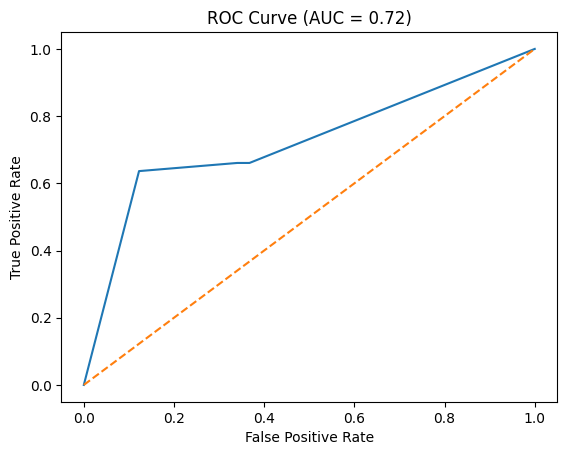

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = dt.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba)
auc = roc_auc_score(y_test2, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=2,max_leaf_nodes=None,splitter='best')
bag = BaggingClassifier(base_estimator=dt,random_state=42)
bag.fit(x_train2, y_train2)
y_pred2 = bag.predict(x_test2)
accuracydtbm = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracydtbm)

Accuracy: 0.7532051282051282


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


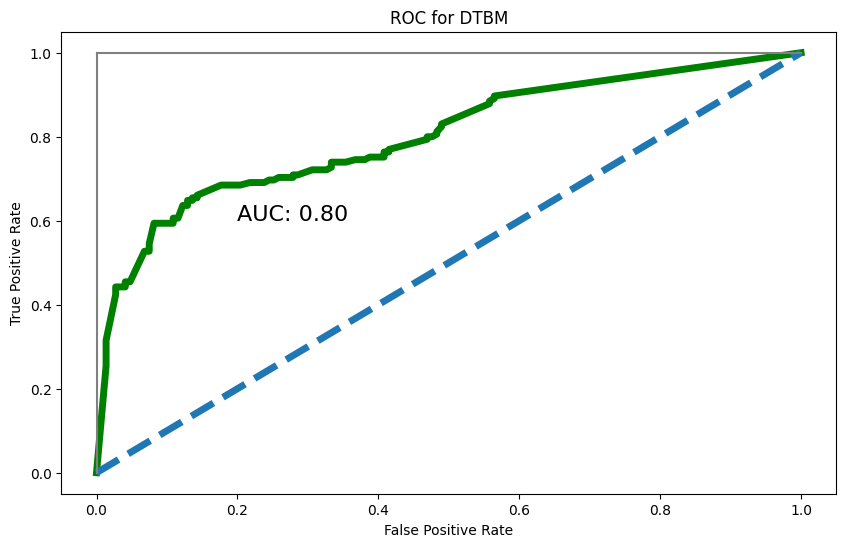

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = bag.predict_proba(x_test2)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for DTBM')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
b=confusion_matrix(y_test2,y_pred2)
sns.heatmap(pd.DataFrame(b), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DTBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### **RANDOM FOREST**

In [ ]:
# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rf = RandomForestClassifier(criterion='gini',max_depth=5,
                            max_features='sqrt',min_samples_split=21,min_samples_leaf=1)
rf.fit(x_train2, y_train2)
y_pred2 = rf.predict(x_test2)
accuracyrf = accuracy_score(y_test2, y_pred2)
print('Accuracy:', accuracyrf)

Accuracy: 0.7435897435897436


In [ ]:
rfcm=confusion_matrix(y_test2,y_pred2)
sns.heatmap(pd.DataFrame(rfbmcm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for RFBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

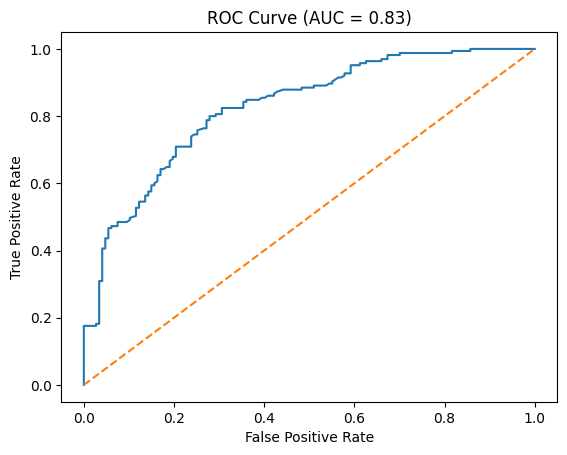

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = rf.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba)
auc = roc_auc_score(y_test2, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(criterion='gini',max_depth=5,
                            max_features='sqrt',min_samples_split=21,min_samples_leaf=1)
bagged_rf = BaggingClassifier(base_estimator=rf, random_state=42)
bagged_rf.fit(x_train2, y_train2)
y_pred2 = bagged_rf.predict(x_test2)
accuracyrfbm = accuracy_score(y_test2, y_pred2)
print('Accuracy:', accuracyrfbm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7339743589743589


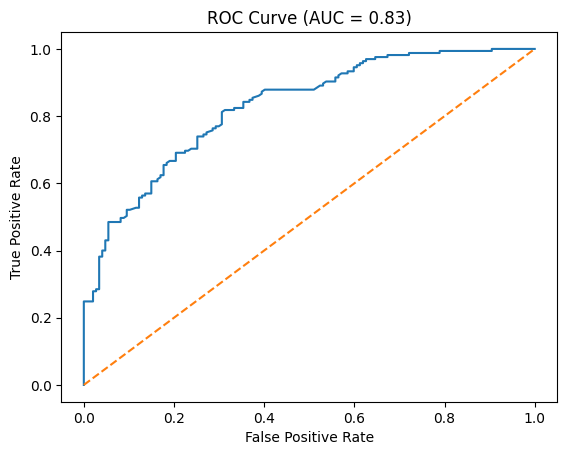

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = bagged_rf.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba)
auc = roc_auc_score(y_test2, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
rfbmcm=confusion_matrix(y_test2,y_pred2)
sns.heatmap(pd.DataFrame(rfbmcm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for RFBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### **K NEAREST NEIGHBOUR**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric='minkowski',n_jobs=1,weights='uniform')
model.fit(x_train2, y_train2)
Y_pred = model.predict(x_test2)
score_knn = model.score(x_test2, y_test2)
print('accuracy:', score_knn)

accuracy: 0.6538461538461539


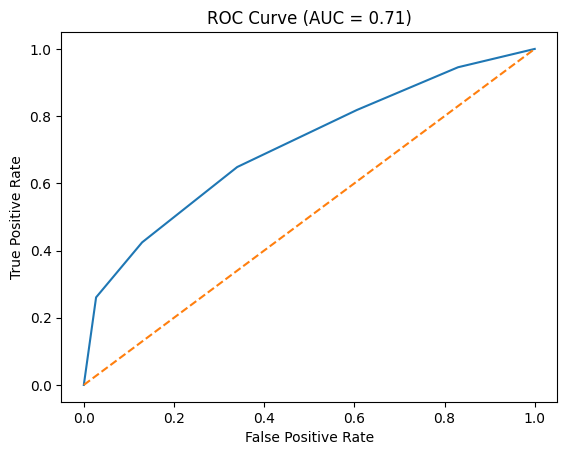

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = model.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba)
auc = roc_auc_score(y_test2, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

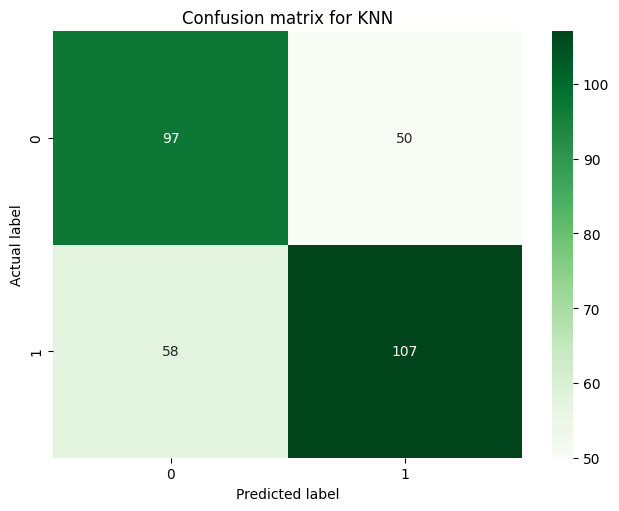

In [ ]:
knn_cm=confusion_matrix(y_test2,Y_pred)
sns.heatmap(pd.DataFrame(knn_cm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
rf = KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric='minkowski',n_jobs=1,weights='uniform')
bagged_rf = BaggingClassifier(base_estimator=rf, random_state=42)
bagged_rf.fit(x_train2, y_train2)
y_pred2 = bagged_rf.predict(x_test2)
accuracyknbm = accuracy_score(y_test2, y_pred2)
print('Accuracy:', accuracyknbm)

Accuracy: 0.6858974358974359


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


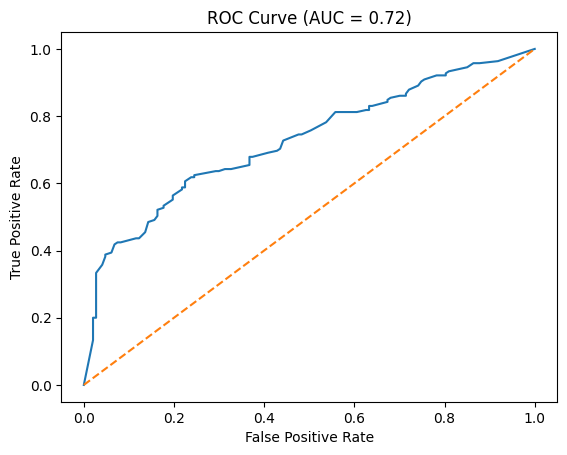

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = bagged_rf.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba)
auc = roc_auc_score(y_test2, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

### **ADAPTIVE BOOSTING**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(x_train2, y_train2)
y_pred = adaboost.predict(x_test2)
accada=accuracy_score(y_test, y_pred)
print("AdaBoost Classifier accuracy:", accada)

AdaBoost Classifier accuracy: 0.75


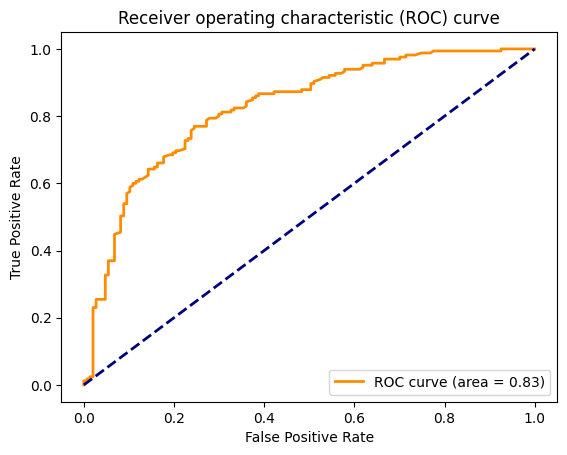

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_proba = adaboost.predict_proba(x_test2)[:, 1]
fpr, tpr, _ = roc_curve(y_test2, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = adaboost.predict(x_test2)
cm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
bagging_adaboost = BaggingClassifier(base_estimator=adaboost, n_estimators=10, random_state=42)
bagging_adaboost.fit(x_train2, y_train2)
y_pred = bagging_adaboost.predict(x_test2)
accuracy = accuracy_score(y_test2, y_pred)
print("Bagging-AdaBoost accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging-AdaBoost accuracy: 0.7339743589743589


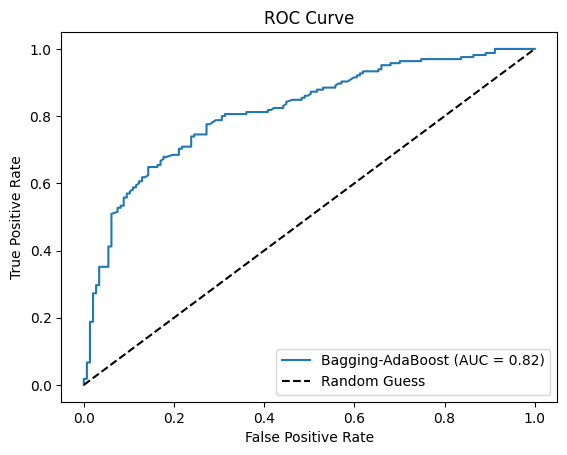

In [ ]:
y_pred = bagging_adaboost.predict(x_test2)
y_prob = bagging_adaboost.predict_proba(x_test2)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='Bagging-AdaBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


In [ ]:
conf_mat = confusion_matrix(y_test2, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
grad_boost.fit(x_train2, y_train2)
y_pred = grad_boost.predict(x_test2)
graaccuracy = accuracy_score(y_test2, y_pred)
print("Accuracy:", graaccuracy)


Accuracy: 0.7692307692307693


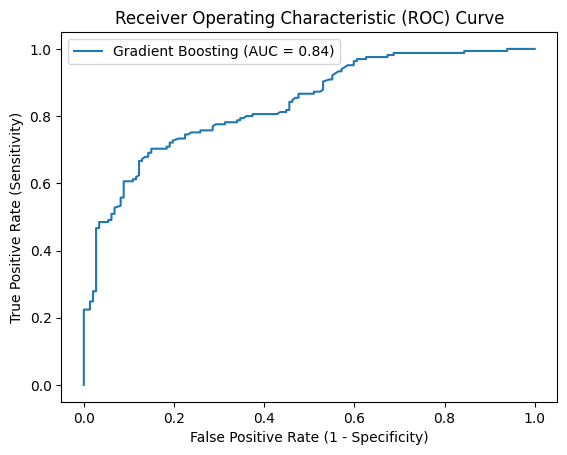

In [ ]:
y_prob = grad_boost.predict_proba(x_test2)[:,1]
fpr, tpr, thresholds = roc_curve(y_test2, y_prob)
roc_auc = roc_auc_score(y_test2, y_prob)
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
cm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
bagging = BaggingClassifier(base_estimator=grad_boost, n_estimators=10)
bagging.fit(x_train2, y_train2)
y_pred = bagging.predict(x_test2)
Gradboostaccuracy = accuracy_score(y_test2, y_pred)
print("Accuracy:", Gradboostaccuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7435897435897436


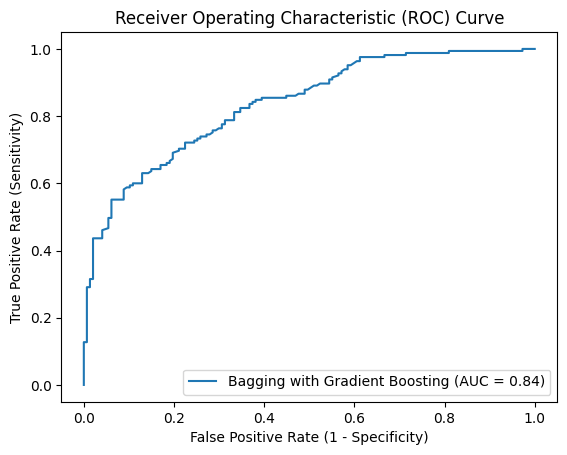

In [ ]:
y_prob = bagging.predict_proba(x_test2)[:,1]
fpr, tpr, thresholds = roc_curve(y_test2, y_prob)
roc_auc = roc_auc_score(y_test2, y_prob)
plt.plot(fpr, tpr, label='Bagging with Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
cm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print("Accuracy of decision tree:",Accuracydt)
print("Accuracy of random forest:",Accuracyrf)
print("Accuracy of knn:",Score_knn)
print("Accuracy of decision tree bagging method:",Accuracydtbm)
print("Accuracy of randomforest bagging method:",Accuracyrfbm)
print("Accuracy of KNN bagging method:",Accuracyknbm)
print("Accuracy of adaboost:",accada)
print("Accuracy of Bagging-AdaBoost ", accuracy)
print("Accuracy of Gradient Boost ", graaccuracy)
print("Accuracy of Bagging-Gradient Boost ", Gradboostaccuracy)

Accuracy of decision tree: 0.75
Accuracy of random forest: 0.7371794871794872
Accuracy of knn: 0.6923076923076923
Accuracy of decision tree bagging method: 0.7435897435897436
Accuracy of randomforest bagging method: 0.7532051282051282
Accuracy of KNN bagging method: 0.7051282051282052
Accuracy of adaboost: 0.75
Accuracy of Bagging-AdaBoost  0.7339743589743589
Accuracy of Gradient Boost  0.7692307692307693
Accuracy of Bagging-Gradient Boost  0.7435897435897436


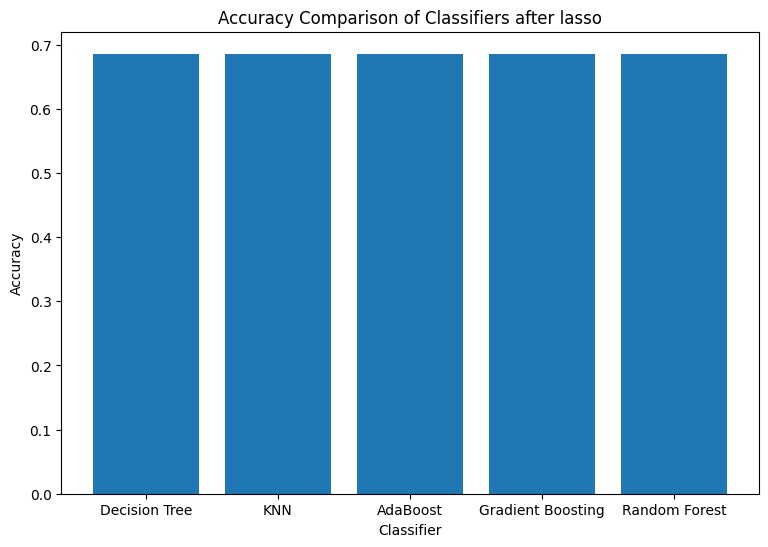

In [ ]:
classifiers = [DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier()
]
results = []
for clf in classifiers:
    clf.fit(x_train2, y_train2)
    y_pred = clf.predict(x_test2)
    accuracy = accuracy_score(y_test2, y_pred2)
    results.append(accuracy)
classifiers_names = ['Decision Tree', 'KNN', 'AdaBoost', 'Gradient Boosting', 'Random Forest']
plt.figure(figsize=(9, 6))
plt.bar(classifiers_names, results)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers after lasso')
plt.show()

## **RELIEF**

In [ ]:
!pip install skrebate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=cc7da27d551bec8dd3fb6e5c08c5fe69d4ad7da69219ed00a8add2721e8ff8d8
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


In [ ]:
from skrebate import ReliefF
fs = ReliefF(n_neighbors=10)
fs

ReliefF(n_neighbors=10)

In [ ]:
relief = Lasso(alpha=0.001)
relief.fit(X_Train, y_train)
rcoeffs = pd.DataFrame({'Variable': x.columns, 'Coefficient': relief.coef_})
rcoeffs = rcoeffs.sort_values(by='Coefficient', ascending=False)

In [ ]:
rcoefs = relief.coef_
features = x.columns
coefnames = sorted(zip(rcoefs, features), reverse=True)
selected_features1 = [coef_name[1] for coef_name in coefnames if coef_name[1] not in ['oldpeak', 'slope','thal']]
print(selected_features1)

['cp', 'exang', 'sex', 'ca', 'trestbps', 'restecg', 'age', 'fbs', 'chol', 'thalach']


In [ ]:
x_modify=X[selected_features1]
x_modify

,cp,exang,sex,ca,trestbps,restecg,age,fbs,chol,thalach
0,1,0.0,1,0.0,145.0,1.0,63,2.0,233.0,150.0
1,4,1.0,1,3.0,160.0,0.0,67,2.0,286.0,108.0
2,4,1.0,1,2.0,120.0,0.0,67,2.0,229.0,129.0
3,3,0.0,1,0.0,130.0,0.0,37,0.0,250.0,187.0
4,2,0.0,0,0.0,130.0,0.0,41,2.0,204.0,172.0
...,...,...,...,...,...,...,...,...,...,...
1553,2,0.0,0,-9.0,120.0,0.0,54,0.0,221.0,138.0
1554,2,-9.0,0,-9.0,-9.0,0.0,48,1.0,308.0,-9.0
1555,4,0.0,1,-9.0,130.0,0.0,53,0.0,182.0,148.0
1556,2,0.0,1,-9.0,130.0,0.0,51,0.0,224.0,150.0


In [ ]:
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x_modify, Y, test_size = 0.2, random_state=0)

### **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score
dt = DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=2,max_leaf_nodes=None,splitter='best')
dt.n_classes_ = 2  # Set number of classes
dt.fit(x_Train, y_Train)
y_Pred= dt.predict(x_Test)
accuracydt = accuracy_score(y_Test, y_Pred)
print('Accuracy:', accuracydt)
precisiondt = precision_score(y_Test, y_Pred)
print(" Decision tree Precision:", precisiondt)

Accuracy: 0.7307692307692307
 Decision tree Precision: 0.813953488372093


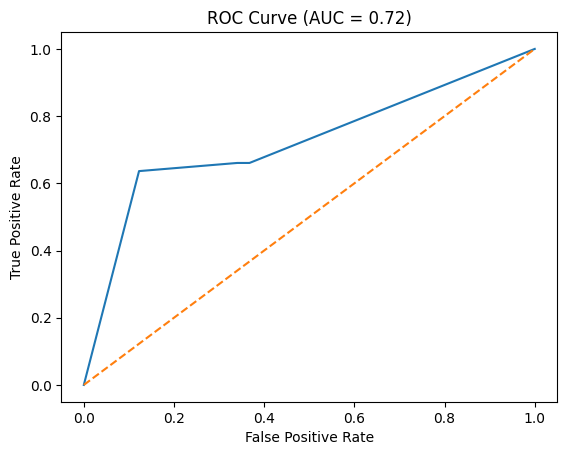

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = dt.predict_proba(x_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_Test, y_proba)
auc = roc_auc_score(y_Test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
dtree_cm=confusion_matrix(y_Test,y_Pred)
sns.heatmap(pd.DataFrame(dtree_cm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DT')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state=42,min_samples_split=2,max_leaf_nodes=None,splitter='best')
bag = BaggingClassifier(base_estimator=dt,random_state=42)
bag.fit(x_Train, y_Train)
y_Pred = bag.predict(x_Test)
accuracydtbm = accuracy_score(y_Test, y_Pred)
print("Accuracy:", accuracydtbm)
precisiondtb = precision_score(y_Test, y_Pred)
print("Decision tree bagging Precision:", precisiondtb)

Accuracy: 0.717948717948718
Decision tree bagging Precision: 0.7894736842105263


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


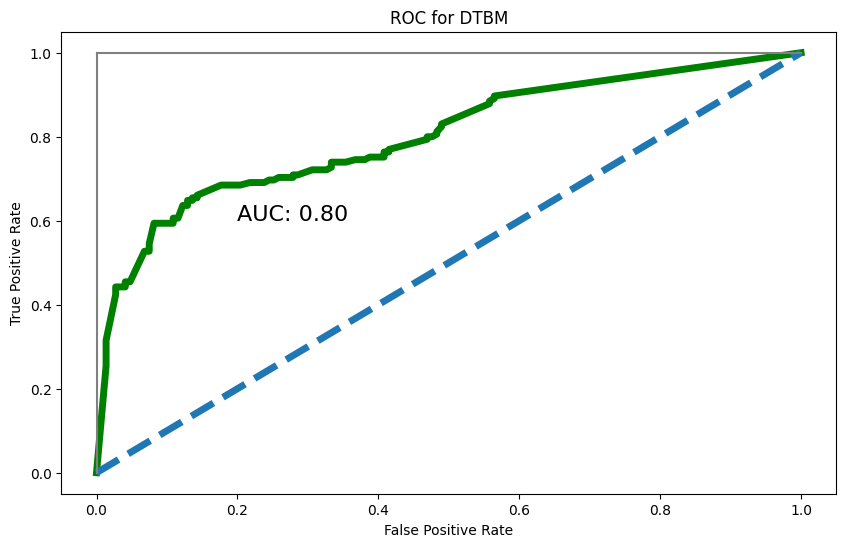

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = bag.predict_proba(x_Test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for DTBM')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
b=confusion_matrix(y_Test,y_Pred)
sns.heatmap(pd.DataFrame(b), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for DTBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### **RANDOM FOREST**

In [ ]:
# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rf = RandomForestClassifier(criterion='gini',max_depth=5,
                            max_features='sqrt',min_samples_split=21,min_samples_leaf=1)
rf.fit(x_Train, y_Train)
y_Pred = rf.predict(x_Test)
accuracyrf = accuracy_score(y_Test, y_Pred)
print('Accuracy:', accuracyrf)
precisiondrf = precision_score(y_Test, y_Pred)

Accuracy: 0.7211538461538461


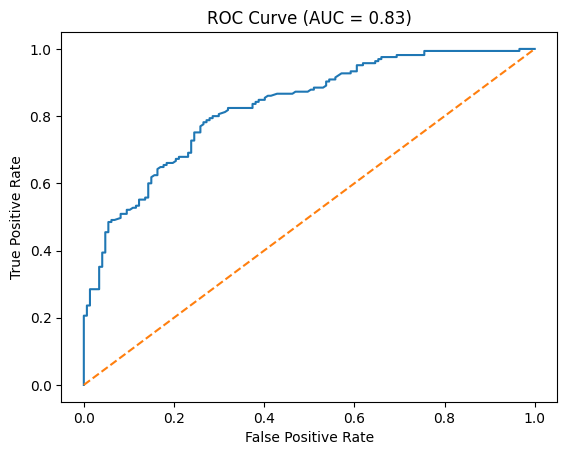

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = rf.predict_proba(x_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_Test, y_proba)
auc = roc_auc_score(y_Test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
rfcm=confusion_matrix(y_Test,y_Pred)
sns.heatmap(pd.DataFrame(rfbmcm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for RFBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(criterion='gini',max_depth=5,
                            max_features='sqrt',min_samples_split=21,min_samples_leaf=1)
bagged_rf = BaggingClassifier(base_estimator=rf, random_state=42)
bagged_rf.fit(x_Train, y_Train)
y_Pred = bagged_rf.predict(x_Test)
accuracyrfbm = accuracy_score(y_Test, y_Pred)
print('Accuracy:', accuracyrfbm)
precisiondrfb = precision_score(y_Test, y_Pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7243589743589743


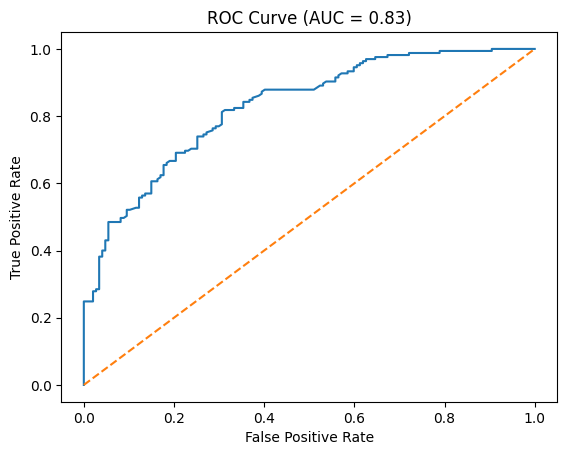

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = bagged_rf.predict_proba(x_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_Test, y_proba)
auc = roc_auc_score(y_Test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
rfbmcm=confusion_matrix(y_Test,y_Pred)
sns.heatmap(pd.DataFrame(rfbmcm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for RFBM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### **K NEAREST NEIGHBOUR**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric='minkowski',n_jobs=1,weights='uniform')
model.fit(x_Train, y_Train)
Y_pred = model.predict(x_Test)
score_knn = model.score(x_Test, y_Test)
print('accuracy:', score_knn)
precisiondknn = precision_score(y_Test, y_Pred)

accuracy: 0.6346153846153846


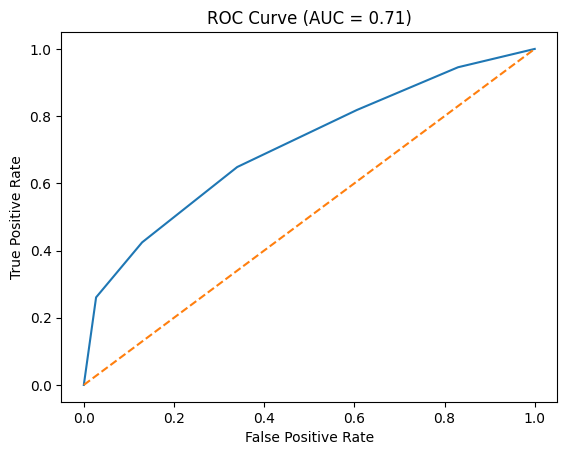

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = model.predict_proba(x_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_Test, y_proba)
auc = roc_auc_score(y_Test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

In [ ]:
knn_cm=confusion_matrix(y_Test,Y_pred)
sns.heatmap(pd.DataFrame(knn_cm), annot = True, cmap = 'Greens', fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
rf = KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric='minkowski',n_jobs=1,weights='uniform')
bagged_rf = BaggingClassifier(base_estimator=rf, random_state=42)
bagged_rf.fit(x_Train, y_Train)
y_Pred2 = bagged_rf.predict(x_Test)
accuracyknbm = accuracy_score(y_Test, y_Pred)
print('Accuracy:', accuracyknbm)
precisiondknnb= precision_score(y_Test, y_Pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7243589743589743


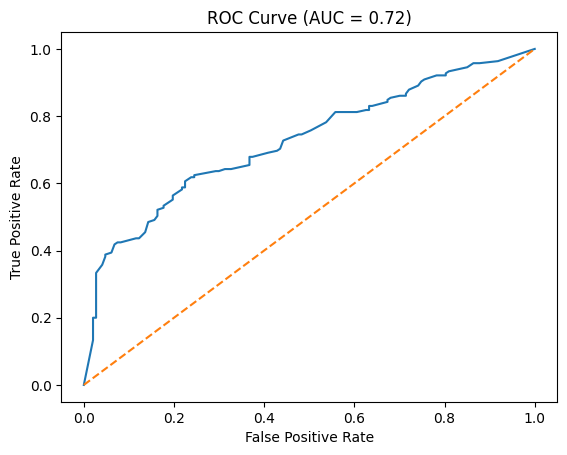

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
y_proba = bagged_rf.predict_proba(x_Test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_Test, y_proba)
auc = roc_auc_score(y_Test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc))
plt.show()

### **ADAPTIVE BOOSTING**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(x_Train, y_Train)
y_Pred = adaboost.predict(x_Test)
accada=accuracy_score(y_Test, y_Pred)
print("AdaBoost Classifier accuracy:", accada)
precisiondab = precision_score(y_Test, y_Pred)

AdaBoost Classifier accuracy: 0.7371794871794872


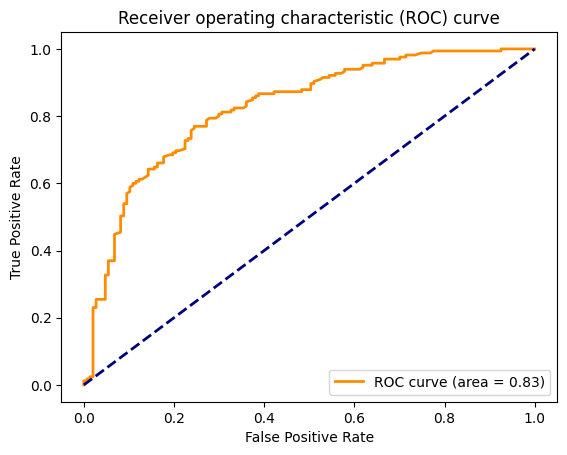

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_Proba = adaboost.predict_proba(x_Test)[:, 1]
fpr, tpr, _ = roc_curve(y_Test, y_Proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_Pred = adaboost.predict(x_Test)
cm = confusion_matrix(y_Test, y_Pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
bagging_adaboost = BaggingClassifier(base_estimator=adaboost, n_estimators=10, random_state=42)
bagging_adaboost.fit(x_Train, y_Train)
y_pred = bagging_adaboost.predict(x_Test)
accuracy = accuracy_score(y_Test, y_pred)
print("Bagging-AdaBoost accuracy:", accuracy)
precisiondabb = precision_score(y_Test, y_Pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging-AdaBoost accuracy: 0.7211538461538461


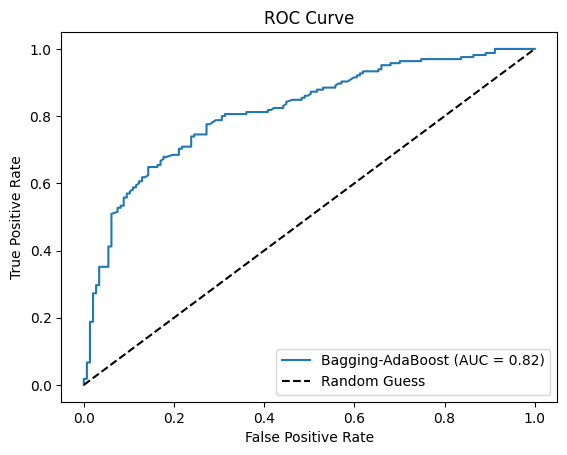

In [ ]:
y_pred = bagging_adaboost.predict(x_Test)
y_prob = bagging_adaboost.predict_proba(x_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_Test, y_prob)
roc_auc = roc_auc_score(y_Test, y_prob)
plt.plot(fpr, tpr, label='Bagging-AdaBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


In [ ]:
conf_mat = confusion_matrix(y_Test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
grad_boost.fit(x_Train, y_Train)
y_pred = grad_boost.predict(x_Test)
graaccuracy = accuracy_score(y_Test, y_pred)
print("Accuracy:", graaccuracy)
precisiondgb = precision_score(y_Test, y_Pred)

Accuracy: 0.7532051282051282


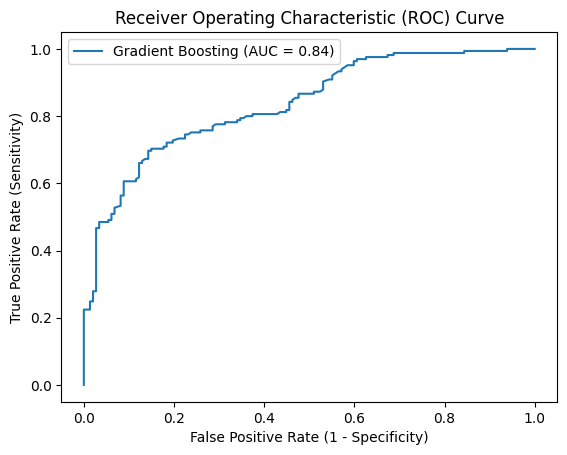

In [ ]:
y_prob = grad_boost.predict_proba(x_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_Test, y_prob)
roc_auc = roc_auc_score(y_Test, y_prob)
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
cm = confusion_matrix(y_Test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
bagging = BaggingClassifier(base_estimator=grad_boost, n_estimators=10)
bagging.fit(x_Train, y_Train)
y_pred = bagging.predict(x_Test)
Gradboostaccuracy = accuracy_score(y_Test, y_pred)
print("Accuracy:", Gradboostaccuracy)
precisiongbb = precision_score(y_Test, y_Pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7532051282051282


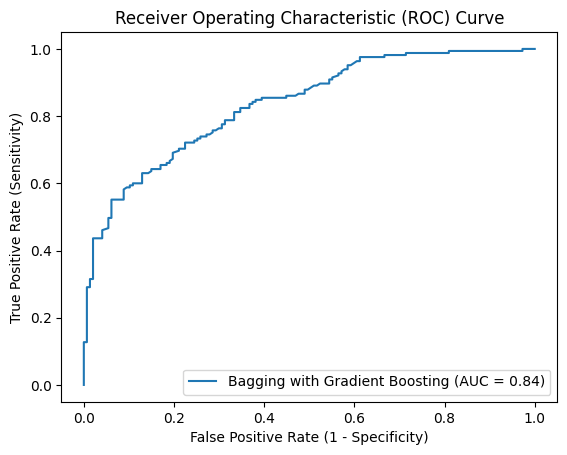

In [ ]:
y_prob = bagging.predict_proba(x_Test)[:,1]
fpr, tpr, thresholds = roc_curve(y_Test, y_prob)
roc_auc = roc_auc_score(y_test2, y_prob)
plt.plot(fpr, tpr, label='Bagging with Gradient Boosting (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
conf_mat = confusion_matrix(y_Test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("Accuracy of decision tree:",Accuracydt)
print("Accuracy of random forest:",Accuracyrf)
print("Accuracy of knn:",Score_knn)
print("Accuracy of decision tree bagging method:",Accuracydtbm)
print("Accuracy of randomforest bagging method:",Accuracyrfbm)
print("Accuracy of KNN bagging method:",Accuracyknbm)
print("Accuracy of adaboost:",accada)
print("Accuracy of Bagging-AdaBoost ", accuracy)
print("Accuracy of Gradient Boost ", graaccuracy)
print("Accuracy of Bagging-Gradient Boost ", Gradboostaccuracy)

Accuracy of decision tree: 0.75
Accuracy of random forest: 0.7371794871794872
Accuracy of knn: 0.6923076923076923
Accuracy of decision tree bagging method: 0.7435897435897436
Accuracy of randomforest bagging method: 0.7532051282051282
Accuracy of KNN bagging method: 0.7051282051282052
Accuracy of adaboost: 0.75
Accuracy of Bagging-AdaBoost  0.7339743589743589
Accuracy of Gradient Boost  0.7660256410256411
Accuracy of Bagging-Gradient Boost  0.7371794871794872


In [ ]:
print("Precision of decision tree:",precisiondt)
print("Precision of random forest:",precisiondrf)
print("Precision of knn:",precisiondknn)
print("Precision of decision tree bagging method:",precisiondtb)
print("Precision of randomforest bagging method:",precisiondrfb)
print("Precision of KNN bagging method:",precisiondknnb)
print("Precision of adaboost:",precisiondab)
print("Precision of Bagging-AdaBoost ", precisiondabb)
print("Precision of Gradient Boost ", precisiondgb)
print("Precision of Bagging-Gradient Boost ", precisiongbb)

Precision of decision tree: 0.813953488372093
Precision of random forest: 0.7867647058823529
Precision of knn: 0.7883211678832117
Precision of decision tree bagging method: 0.7894736842105263
Precision of randomforest bagging method: 0.7883211678832117
Precision of KNN bagging method: 0.7883211678832117
Precision of adaboost: 0.7712418300653595
Precision of Bagging-AdaBoost  0.7712418300653595
Precision of Gradient Boost  0.7712418300653595
Precision of Bagging-Gradient Boost  0.7712418300653595


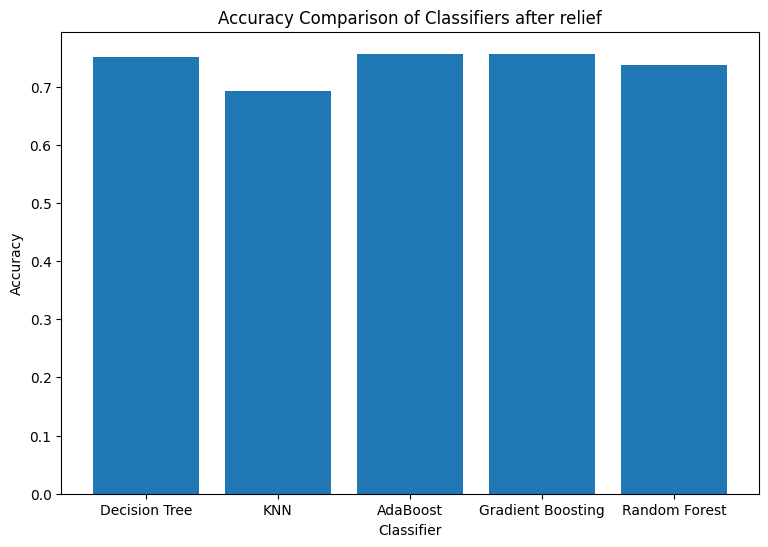

In [ ]:
classifiers = [DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier()
]
results = []
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
classifiers_names = ['Decision Tree', 'KNN', 'AdaBoost', 'Gradient Boosting', 'Random Forest']
plt.figure(figsize=(9, 6))
plt.bar(classifiers_names, results)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers after relief')
plt.show()

In [ ]:
import pickle

In [ ]:
filename = 'heart_disease_model_dtbm.sav'
pickle.dump(bag, open(filename, 'wb'))
filename = 'heart_disease_model_rfbm.sav'
pickle.dump(bagged_rf, open(filename, 'wb'))
filename = 'heart_disease_model_knnbm.sav'
pickle.dump(bagged_rf, open(filename, 'wb'))
filename = 'heart_disease_model_adaboost.sav'
pickle.dump(bagging_adaboost, open(filename, 'wb'))
filename = 'heart_disease_model_gradientboost.sav'
pickle.dump(bagging, open(filename, 'wb'))


In [ ]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model_dtbm.sav', 'rb'))
loaded_model = pickle.load(open('heart_disease_model_rfbm.sav', 'rb'))
loaded_model = pickle.load(open('heart_disease_model_knnbm.sav', 'rb'))
loaded_model = pickle.load(open('heart_disease_model_adaboost.sav', 'rb'))
loaded_model = pickle.load(open('heart_disease_model_gradientboost.sav', 'rb'))

In [ ]:
filename = 'relief_dtbm.sav'
pickle.dump(bag, open(filename, 'wb'))
filename = 'relief_rfbm.sav'
pickle.dump(bagged_rf, open(filename, 'wb'))
filename = 'relief_knnbm.sav'
pickle.dump(bagged_rf, open(filename, 'wb'))
filename = 'relief_adaboost.sav'
pickle.dump(bagging_adaboost, open(filename, 'wb'))
filename = 'relief_gradientboost.sav'
pickle.dump(bagging, open(filename, 'wb'))


In [ ]:
# loading the saved model
loaded_model = pickle.load(open('relief_dtbm.sav', 'rb'))
loaded_model = pickle.load(open('relief_rfbm.sav', 'rb'))
loaded_model = pickle.load(open('relief_knnbm.sav', 'rb'))
loaded_model = pickle.load(open('relief_adaboost.sav', 'rb'))
loaded_model = pickle.load(open('relief_gradientboost.sav', 'rb'))